Author: Arina

Hand in deadline: 20th of December 2020

# Part#2

## Importing python libraries

Installing OpenCV on Conda environment with: pip install opencv-python

In [1]:
import numpy as np
import math
import time
import cv2
import skimage.io as io
import matplotlib.pyplot as plt
import scipy.signal as signal

%matplotlib inline

## Camera Maniputation Using OpenCV

### Producing an upside-down video

In [13]:
cap = cv2.VideoCapture(0)

while(True):  
    ret, frame = cap.read()
    img = cv2.flip(frame,1)
    img = cv2.flip(img,0)
    
    cv2.imshow('Video Capture', img)#show image
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

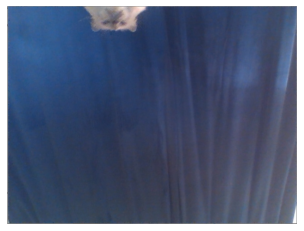

In [14]:
#still of the video
img = io.imread('ulva1.jpg')
fig = plt.imshow(img)
plt.axis('off')
plt.show()

### Recording and playing a video

In [15]:
filename = "ulva2.avi"
imgsize = (640,480)
frame_ps = 30.0
writer = cv2.VideoWriter(filename, 
                         cv2.VideoWriter_fourcc(*"MJPG"), 
                         frame_ps, 
                         imgsize)
cap = cv2.VideoCapture(0)
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        writer.write(frame)
        cv2.imshow('Video Capture', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else: break

cap.release()
writer.release()
cv2.destroyAllWindows()

Playing the video

In [16]:
filename = "ulva2_Copy.avi"
cap = cv2.VideoCapture(filename)
while(cap.isOpened()):
    ret, frame = cap.read()
    
    if ret == True:
        cv2.imshow('frame', frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else: break
            
cap.release()
cv2.destroyAllWindows()

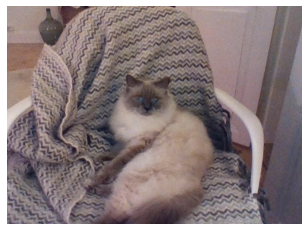

In [17]:
#still of the video
img = io.imread('ulva2.jpg')
fig = plt.imshow(img)
plt.axis('off')
plt.show()

### Resizing, Changing colorframe

In [18]:
def rescale_frame(frame, percent=75):
    """
    Unfortunately my camera does not support manually changing video format.
    So I stole this function from the internet.
    https://www.codingforentrepreneurs.com/blog/open-cv-python-change-video-resolution-or-scale
    """
    width = int(frame.shape[1] * percent/ 100)
    height = int(frame.shape[0] * percent/ 100)
    dim = (width, height)
    return cv2.resize(frame, dim, interpolation =cv2.INTER_AREA)

In [19]:
cap = cv2.VideoCapture(0)
while(True):
    ret, frame = cap.read()
    frame75 = rescale_frame(frame)
    
    #img = cv2.cvtColor(frame75, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(frame75, cv2.COLOR_BGR2GRAY)
    
    cv2.imshow('Black and White filter', img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

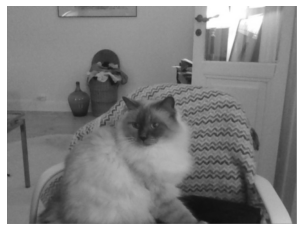

In [20]:
#still of the video
img = io.imread('ulva3.jpg')
fig = plt.imshow(img)
plt.axis('off')
plt.show()

### Enhancing Image contrast

In [21]:
def equalizeHistColor(frame):
    
    img = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)
    img[:,:,2] = cv2.equalizeHist(img[:,:,2])
    
    return cv2.cvtColor(img, cv2.COLOR_HSV2BGR)

In [22]:
cap = cv2.VideoCapture(0)
while(True):
    ret, frame = cap.read()
    img = equalizeHistColor(frame)
    
    cv2.imshow('Histogram Equalization', img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

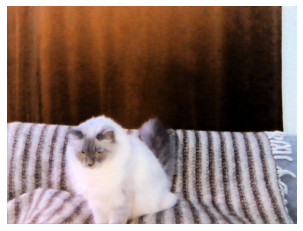

In [23]:
#still of the video
img = io.imread('ulva4.jpg')
fig = plt.imshow(img)
plt.axis('off')
plt.show()

### Adding filter with color and distortion

In [24]:
def warpImage(frame):
    ax, bx=10.0,100
    ay, by=20.0,120
    img = np.zeros(frame.shape, dtype=frame.dtype)
    rows, cols = img.shape[:2]
    
    for i in range(rows):
        for j in range(cols):
            x_off = int(ax*math.sin(2*math.pi*i/bx))
            y_off = int(ay*math.cos(2*math.pi*j/by))
            
            if i+y_off < rows & j+x_off < cols:
                img[i,j] = frame[(i+y_off)%rows, (j+x_off)%cols]
            else:
                img[i,j]=0
    return img

In [25]:
x_scale=0.5
y_scale=0.5

cap = cv2.VideoCapture(0)
while(cap.isOpened()):
    ret, frame = cap.read()
    frame = cv2.resize(frame, None, 
                       fx=x_scale, 
                       fy=y_scale, 
                       interpolation=cv2.INTER_AREA)
    if ret==1:
        img = equalizeHistColor(warpImage(frame))
    else:
        img = equalizeHistColor(frame)
        
    cv2.imshow('Warped Video', img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

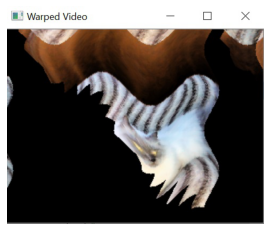

In [26]:
#still of the video
img = io.imread('ulva_warped.jpg')
fig = plt.imshow(img)
plt.axis('off')
plt.show()

This excersise dit not fully work for me as as there are plack pixels added to the video. I believe this particular distortion does not work for my laptop camera, otherwise the filter would apply well. I think it is a problem with the camera resolution.

### Optical Aura Flow

In [27]:
cap = cv2.VideoCapture(0)
ret, frame1 = cap.read()

prvs = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1]=255

while(1):
    ret, frame2 = cap.read()
    
    nxt = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    flow = cv2.calcOpticalFlowFarneback(prvs, nxt, None, 
                                        0.5, 3, 15, 3, 5, 1.2, 0)
    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    prvs = nxt
    
    cv2.imshow('Optical Flow', bgr)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

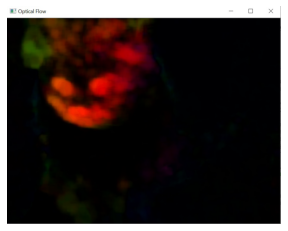

In [28]:
#still of the video
img = io.imread('ulva_optical.jpg')
fig = plt.imshow(img)
plt.axis('off')
plt.show()

## Object Tracking in a Video File

Reading Background video provided

In [10]:
videofile = cv2.VideoCapture('Background_Video_File.avi')
backsub = cv2.createBackgroundSubtractorMOG2(varThreshold=32, 
                                             detectShadows=False)

### Detecting foreground pixels in the first 10 frames

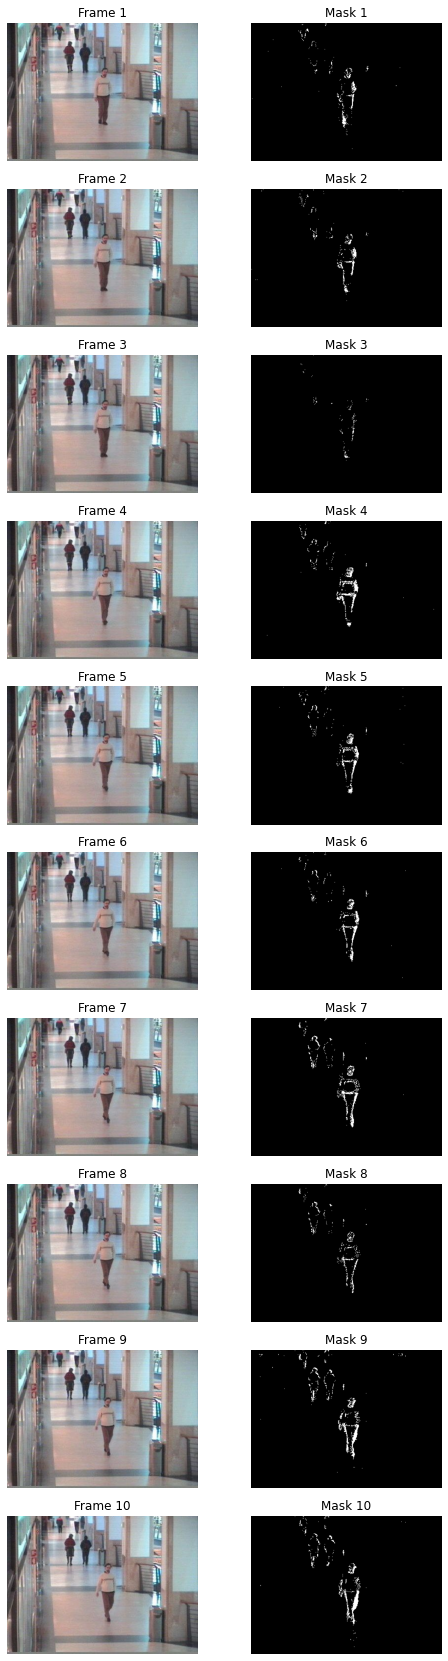

In [12]:
fig, axes = plt.subplots(10, 2, figsize=(8,30))
for i in range(10):
    _, frame = videofile.read()
    mask = backsub.apply(frame)
    
    ax1 = axes[i,0]
    ax1.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    ax1.axis('off')
    ax1.set_title(f'Frame {i+1}')
    
    ax2 = axes[i,1]
    ax2.imshow(mask, cmap='gray')
    ax2.axis('off')
    ax2.set_title(f'Mask {i+1}')

plt.show()

### Detecting object in a frame

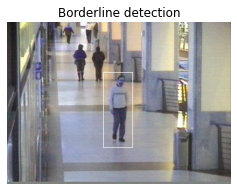

In [5]:
kernel = np.ones((5,5), np.uint8)
closing = cv2.morphologyEx(mask, 
                           cv2.MORPH_CLOSE, 
                           kernel, 
                           iterations=3)
dilation = cv2.dilate(closing, 
                      kernel, 
                      iterations=3)
contours, _ = cv2.findContours(dilation, 
                               cv2.RETR_EXTERNAL,
                               cv2.CHAIN_APPROX_SIMPLE)

max_c = contours[np.argmax([cv2.contourArea(c) for c in contours])]
x, y, w, h = cv2.boundingRect(max_c)
template = frame[y: y+h, x: x+w]

plt.figure(figsize=(4,6))
plt.imshow(cv2.rectangle(frame,
                         (x,y),
                         (x+w,y+h),
                         (255,255,255),
                         1))
plt.title('Borderline detection')
plt.axis('off')
plt.show()

### Tracking an object moving in frames

Observe that this cell only works without errore the first time it is executed. Afterwards template variable resets.

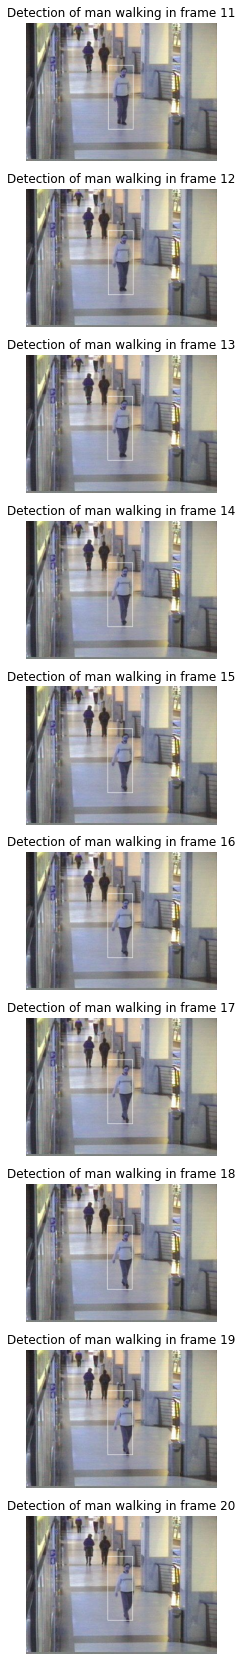

In [6]:
plt.figure(figsize=(4,30))

for i in range(10):
    _, next_frame = videofile.read()
    next_frame_gray = cv2.cvtColor(next_frame, cv2.COLOR_BGR2GRAY)
    next_frame_gray = next_frame_gray - next_frame_gray.mean()
    
    template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    template_gray = template_gray - template_gray.mean()
    
    
    corr = signal.correlate2d(next_frame_gray, 
                              template_gray, 
                              mode='same', 
                              boundary='symm')
    
    y, x = np.unravel_index(np.argmax(corr), corr.shape)
    top_l = x-int(np.floor((w / 2)))
    down_l = y-int(np.floor((h / 2)))
    top_r = x+int(np.floor((w / 2)))
    down_r = y+int(np.floor((h / 2)))
    template = next_frame[down_l: down_r, top_l: top_r]
    
    plt.subplot(10, 1, i+1)
    plt.imshow(cv2.rectangle(next_frame, (top_l, down_l), (top_r, down_r), (255, 255, 255), 1))
    plt.axis('off')
    plt.title(f'Detection of man walking in frame {i+1+10}')

plt.show()
videofile.release()

The code from Part#2 does not re-define the rectangle for object tracking in each frame so the square does not seem to move.

# Challenging Questions

## Q1

Applying Canny on captured frame in video.

In [32]:
parameter1 = 20
parameter2 = 60
intApertureSize=1

cap = cv2.VideoCapture(0)
while(True):
    ret, frame = cap.read()
    
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame_blur = cv2.GaussianBlur(frame_gray, (7, 7), 0)
    canny_edge = cv2.Canny(frame_blur, parameter1, parameter2, intApertureSize)
    
    cv2.imshow('Canny Edge filter', canny_edge)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

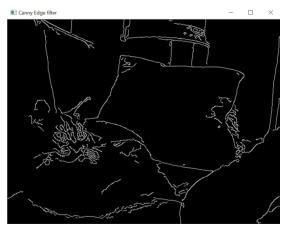

In [33]:
#still of the video
img = io.imread('ulva_canny.jpg')
fig = plt.imshow(img)
plt.axis('off')
plt.show()

## Q2

The Sobel method for edge detection is applying a kernel convolution to find places in an image where there is a line with high contrast or dramatic change in color comparing both sides of the line. The kernel that is uses has negative values one one side of the kernel/filter and positive on the other which will give a response as soon as it hits an edge in the image. Diffeent kernels are applied to find edges in different directions.
https://www.youtube.com/watch?v=uihBwtPIBxM&ab_channel=Computerphile

\begin{equation*}
\begin{vmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{vmatrix}
\end{equation*}

\begin{equation*}
\begin{vmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1
\end{vmatrix}
\end{equation*}

The Laplacian operator uses only one kernel instead of many in different directions. The operator identifies actual edge points instead of directions.
https://www.youtube.com/watch?v=07qwMn2c5iY&ab_channel=WilliamHoff

\begin{equation*}
\begin{vmatrix}
0 & 1 & 0 \\
1 & 4 & 1 \\
0 & 1 & 0
\end{vmatrix}
\end{equation*}

\begin{equation*}
\begin{vmatrix}
1 & 1 & 1 \\
1 & 8 & 1 \\
1 & 1 & 1
\end{vmatrix}
\end{equation*}


Following this tutorial for Sobel and Laplacian: https://www.youtube.com/watch?v=CJMCoAsK-h0&ab_channel=sentdex

In [34]:
cap = cv2.VideoCapture(0)
while(True):
    _, frame = cap.read()
    
    frame50 = rescale_frame(frame, percent=50)
    frame_gray = cv2.cvtColor(frame50, cv2.COLOR_BGR2GRAY)
    frame_blur = cv2.GaussianBlur(frame_gray, (5, 5), 0)
    
    laplacian_frame = cv2.Laplacian(frame_blur, 
                                    cv2.CV_64F, 
                                    scale=0.1,
                                    delta=0)
    laplacian = cv2.GaussianBlur(laplacian_frame, (5, 5), 0)

    sobelx = cv2.Sobel(frame_blur, 
                       cv2.CV_32F, 
                       1, 0, 
                       scale=0.05, 
                       ksize=3)
    sobelx = cv2.GaussianBlur(sobelx, (5, 5), 0)
    
    sobely = cv2.Sobel(frame_blur, 
                       cv2.CV_32F, 
                       0, 1, 
                       scale=0.05, 
                       ksize=3)
    sobely = cv2.GaussianBlur(sobely, (5, 5), 0)
    
    cv2.imshow('Laplacian', laplacian)
    cv2.imshow('Sobel X', sobelx)
    cv2.imshow('Sobel Y', sobely)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

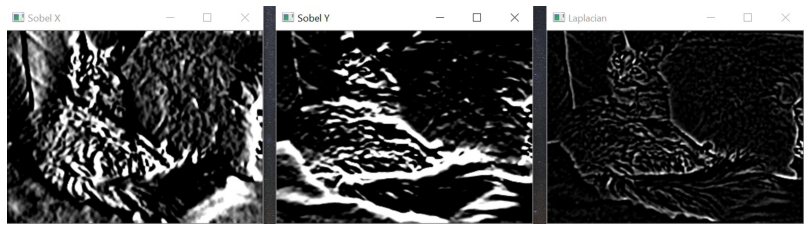

In [35]:
#still of the video
img = io.imread('cat_edge_detection.jpg')
fig = plt.figure(figsize=(15,4))
plt.imshow(img)
plt.axis('off')
plt.show()

## Q3

Superimposing Canny Edge detection on video using cv2.bitwise_and(), cv2.bitwise_not()

Use edge detection as a mask and superimpose the image with the cv2.bitwise_and() function. Its explanation can be found in the OpenCV documentation. First reverse the edge detection results using bitwise NOT to inverse it using cv2.bitwise_not() function, then superimpose it accordingly.

In [36]:
cap = cv2.VideoCapture(0)
while(True):
    _, frame = cap.read()    

    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame_blur = cv2.GaussianBlur(frame_gray, (5,5), 0, 0) 
    frame_canny = cv2.Canny(frame_blur, parameter1, parameter2, intApertureSize)
    mask_edge = cv2.bitwise_not(frame_canny)
    frame_imposed = cv2.bitwise_and(frame, frame, mask=mask_edge)   

    cv2.imshow('Superimposed Video',frame_imposed)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

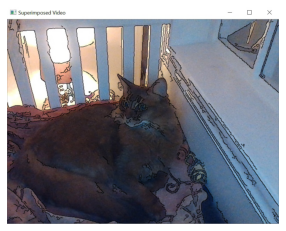

In [37]:
#still of the video
img = io.imread('cat_super.jpg')
fig = plt.imshow(img)
plt.axis('off')
plt.show()

## Q4

Explain the detection procedure in your own words from the section Object Tracking in a video file. What did you learn from this exercise?

In the code for Object Tracking. The procedure should be as follows:
* In cv2.motphologyEx() we are eliminating the background to black fixels and the foreground to white.
* In cv2.dilation, the white parts are dilated
* In cv2.findContours, the contours of the white space
* In max_contours (max_c i my code) the largest values of contours should be detected, this should be the man walking.
* cv2.boundingRect should find the rectangle edge points around the man
* The rest of the code draws the rectangle

## Q5

MOG strength is that this method takes in concideration previous frames of the video when detecting a background. It means that it can work well on complex backgrounds with a lot of things going on that other methods would not be able to distinguish between.
https://www.youtube.com/watch?v=8-3vl71TjDs&ab_channel=sentdex

We have used MOG2 for detecting a man walking but I can do that with another example video.

In [7]:
videofile = cv2.VideoCapture('VID_20201214_151139.mp4')
fgbg = cv2.createBackgroundSubtractorMOG2()

while(True):
    ret, frame = videofile.read()
    if frame is None:
        break
    frame20 = rescale_frame(frame, percent=20)
    mask = fgbg.apply(frame20)
    
    cv2.imshow('Original', frame20)
    cv2.imshow('MOG', mask)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
videofile.release()
cv2.destroyAllWindows()

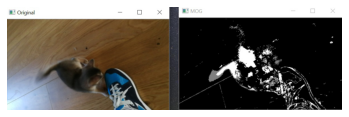

In [8]:
#still of the video
img = io.imread('mog.jpg')
fig = plt.imshow(img)
plt.axis('off')
plt.show()

END